In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from numpy import mean
from sklearn.metrics import mean_squared_error
import math
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing
import itertools
%matplotlib inline

# import pmdarima as pm

# import warnings
# warnings.filterwarnings('ignore')

In [21]:
data = pd.read_csv('IPG2211A2N.csv', header = 0, names = ['Date', 'Energy production'])
data

,Date,Energy production
0,1939-01-01,3.3298
1,1939-02-01,3.3552
2,1939-03-01,3.4315
3,1939-04-01,3.4569
4,1939-05-01,3.4569
...,...,...
993,2021-10-01,90.6041
994,2021-11-01,97.5215
995,2021-12-01,108.1131
996,2022-01-01,130.9957


Text(0, 0.5, 'Energy production')

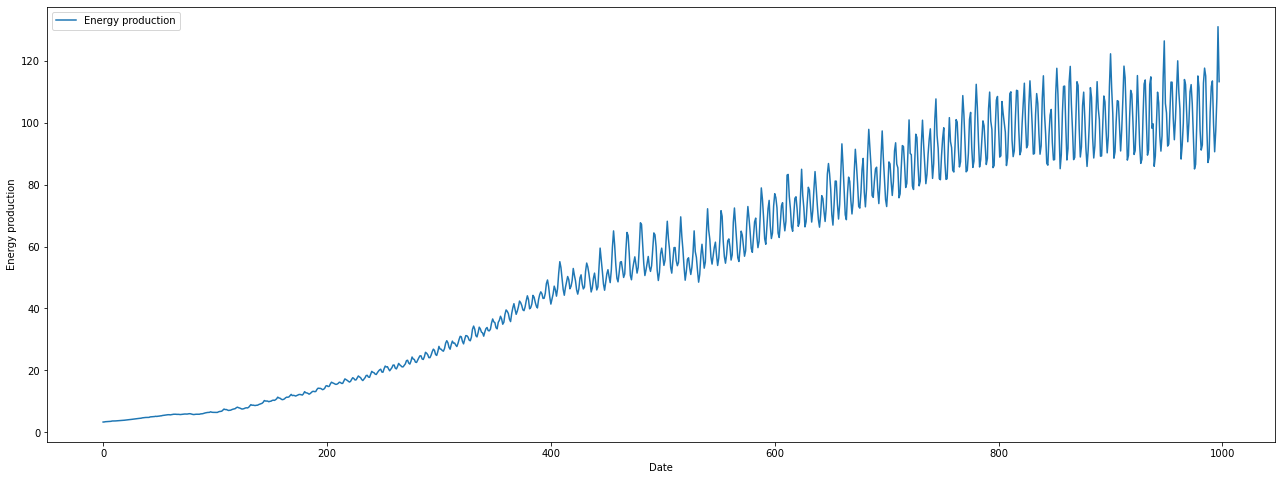

In [63]:
data.plot(figsize = (22,8))
plt.xlabel('Date')
plt.ylabel('Energy production')

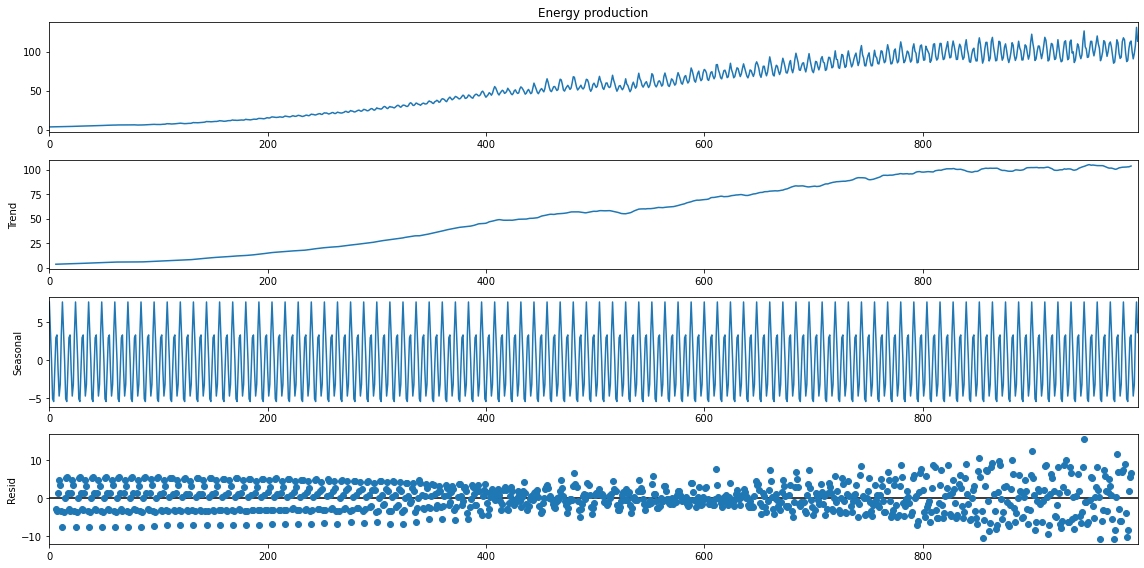

In [64]:
y_decompose = seasonal_decompose(data['Energy production'], model = 'additive', period = 12)
y_decompose_plot = y_decompose.plot()
y_decompose_plot.set_size_inches((16, 8))
y_decompose_plot.tight_layout()

In [71]:
data1 = data.copy()
data1['Moving Avg_12'] = data1['Energy production'].rolling(window=12).mean().shift(1)

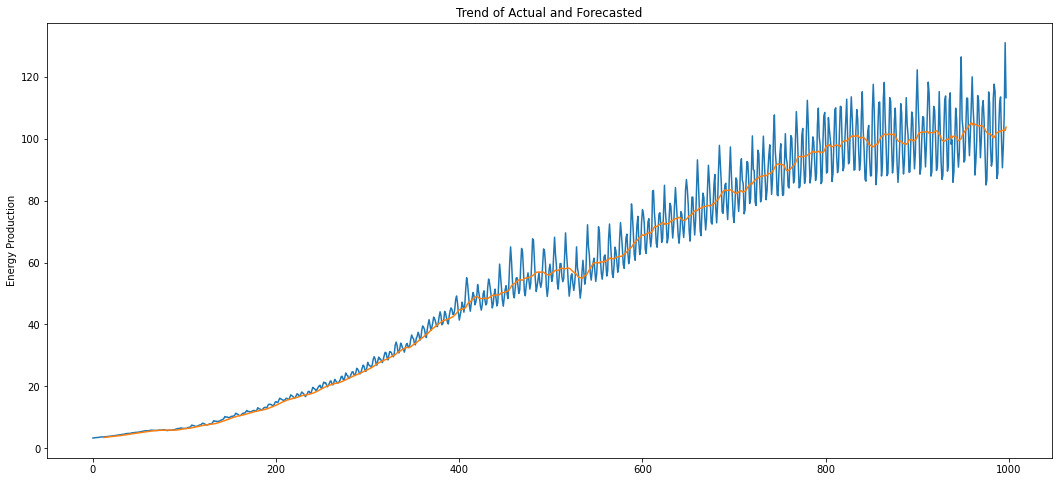

In [73]:
plt.figure(figsize=(18,8))
plt.ylabel('Energy Production')
plt.title('Trend of Actual and Forecasted')
plt.plot(data1[['Energy production','Moving Avg_12']])

In [123]:
# Function for MAPE
def get_mape(actual, predicted):
    return np.round(np.mean(np.abs((actual-predicted) / actual))*100,2)

get_mape(data1['Energy production'][last5years].values, data1['Moving Avg_12'][last5years].values)

8.33

In [124]:
# Calculate RMSE 
np.sqrt(mean_squared_error(data1['Energy production'][last5years].values, data1['Moving Avg_12'][last5years].values))

10.372082890451505

In [127]:
last_5_years = data1.loc[ data1['Date'] >= '2017-02-01']

In [128]:
fit1 = ExponentialSmoothing(np.asarray(data1['Energy production'][:937].values), seasonal_periods=12 ,trend='add', seasonal='add',).fit()
fit1.summary()

Dep. Variable:,endog,No. Observations:,937
Model:,ExponentialSmoothing,SSE,2980.771
Optimized:,True,AIC,1116.347
Trend:,Additive,BIC,1193.830
Seasonal:,Additive,AICC,1117.092
Seasonal Periods:,12,Date:,"Fri, 15 Apr 2022"
Box-Cox:,False,Time:,00:46:41
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4132360,alpha,True
smoothing_trend,0.000000,beta,True


,Date,Energy production,Moving Avg_12
0,1939-01-01,3.3298,NaN
1,1939-02-01,3.3552,NaN
2,1939-03-01,3.4315,NaN
3,1939-04-01,3.4569,NaN
4,1939-05-01,3.4569,NaN
...,...,...,...
932,2016-09-01,100.7410,99.799217
933,2016-10-01,89.5137,99.827475
934,2016-11-01,91.2192,99.808867
935,2016-12-01,112.2788,99.832992


In [130]:
train_data = data1['Energy production'][:937]
test_data = data['Energy production'][last5years]
y_hat_avg = test_data.copy()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test_data))

rms = math.sqrt(mean_squared_error(test_data, y_hat_avg.Holt_Winter))
print(rms)

4.291317121187466


In [131]:
get_mape(test_data, y_hat_avg.Holt_Winter)

3.42

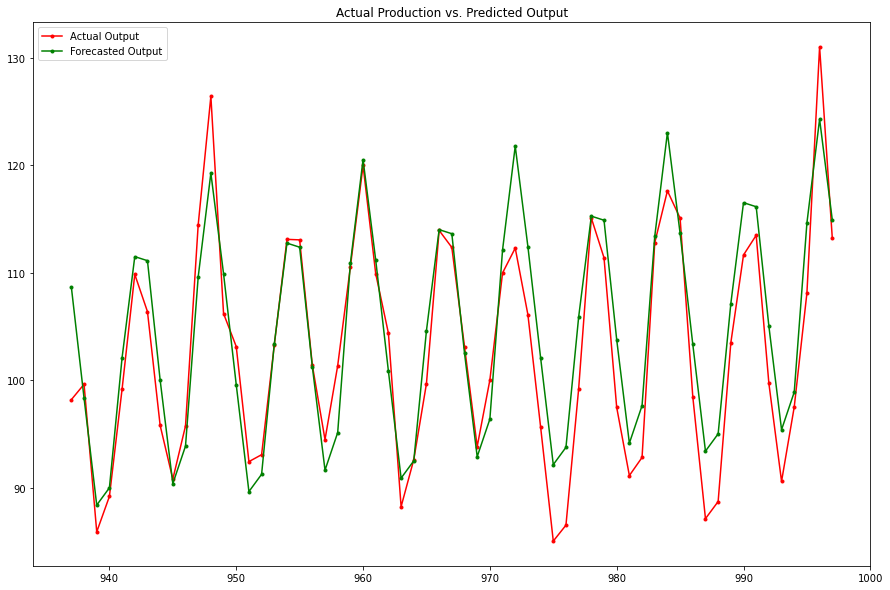

In [134]:
fig = plt.figure(figsize=(15,10));
future, = plt.plot(test_data.index, test_data, 'r.-', label='Actual Output');
predicted_future, = plt.plot(test_data.index, y_hat_avg.Holt_Winter, 'g.-', label='Forecasted Output');
plt.legend(handles=[future, predicted_future]);
plt.title('Actual Production vs. Predicted Output');

Part 2

Text(0.5, 1.0, 'Distribution of White Noise')

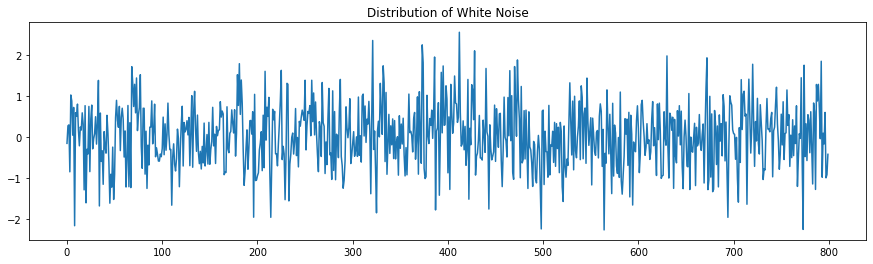

In [136]:
# Plot for White Noise with Mean 0 and standard deviation as 0.8
wnoise= np.random.normal(loc=0, scale=0.8, size=800)
plt.figure(figsize=(15, 4))
plt.plot(wnoise)
plt.title('Distribution of White Noise')

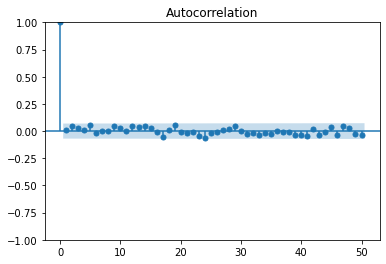

In [141]:
acr = plot_acf(wnoise, lags = 50)

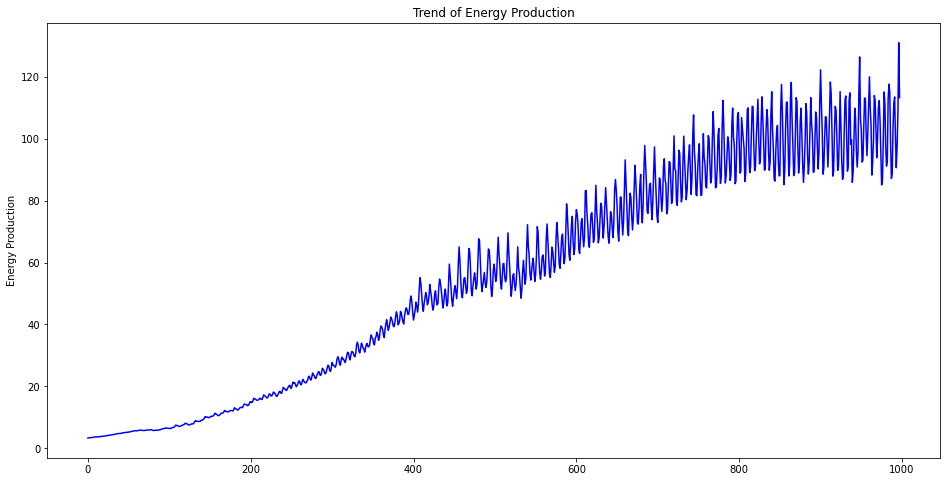

In [143]:
plt.figure(figsize=(16,8))
plt.ylabel('Energy Production')
plt.title('Trend of Energy Production')
plt.plot(data['Energy production'],'b-');


In [148]:
# remove old data and may induce unnecessary noise
data2 = data1[312:]
data2 = pd.DataFrame(data2)
data2

,Date,Energy production,Moving Avg_12
312,1965-01-01,29.4598,27.597883
313,1965-02-01,28.7989,27.739808
314,1965-03-01,28.8497,27.896558
315,1965-04-01,28.1889,28.063892
316,1965-05-01,27.7059,28.212167
...,...,...,...
993,2021-10-01,90.6041,102.677842
994,2021-11-01,97.5215,102.632817
995,2021-12-01,108.1131,103.023967
996,2022-01-01,130.9957,102.634942


Test 1: Augmented Dickey Fuller Test:

In [149]:
X = data2['Energy production'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.205330
p-value: 0.204317
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


Here, the p value is greater than 0.05, thus we fail to reject the Null Hypothesis. Therefore, the series has a unit root and is non stationary.

Test 2 : KPSS Test

In [152]:
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)
kpss_test(data2['Energy production'].values)

Results of KPSS Test:
Test Statistic            4.084285
p-value                   0.010000
Lags Used                16.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/Users/akmal/opt/anaconda3/envs/time_series_coursework/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In both tests p < 0.05, thus this is similar to Scenario 2, where both tests confirm that the given series is non stationary. We will now consider steps to make the series stationary.

In [154]:
data2['Energy_Production_diff'] = data2['Energy production'] - data2['Energy production'].shift(12)
data2[['Energy production','Energy_Production_diff']].head(13)

,Energy production,Energy_Production_diff
312,29.4598,NaN
313,28.7989,NaN
314,28.8497,NaN
315,28.1889,NaN
316,27.7059,NaN
317,28.6972,NaN
318,29.9936,NaN
319,31.0103,NaN
320,30.8578,NaN
321,29.3581,NaN


In [174]:
# data2['Energy_Production_diff1'] = data2.loc[324:]
# data2.head(20)
# xx = data2['Energy_Production_diff'].dropna().values
# len(xx)

data2.dropna(inplace = True)
data2.head(15)

,Date,Energy production,Moving Avg_12,Energy_Production_diff,Energy_Production_diff1
325,1966-02-01,31.1882,29.440717,2.3893,1.7793
326,1966-03-01,30.7561,29.639825,1.9064,2.3893
327,1966-04-01,29.7902,29.798692,1.6013,1.9064
328,1966-05-01,29.5614,29.932133,1.8555,1.6013
329,1966-06-01,30.7053,30.086758,2.0081,1.8555
330,1966-07-01,33.3233,30.254100,3.3297,2.0081
331,1966-08-01,34.3147,30.531575,3.3044,3.3297
332,1966-09-01,33.2979,30.806942,2.4401,3.3044
333,1966-10-01,31.2136,31.010283,1.8555,2.4401
334,1966-11-01,30.8069,31.164908,2.2368,1.8555


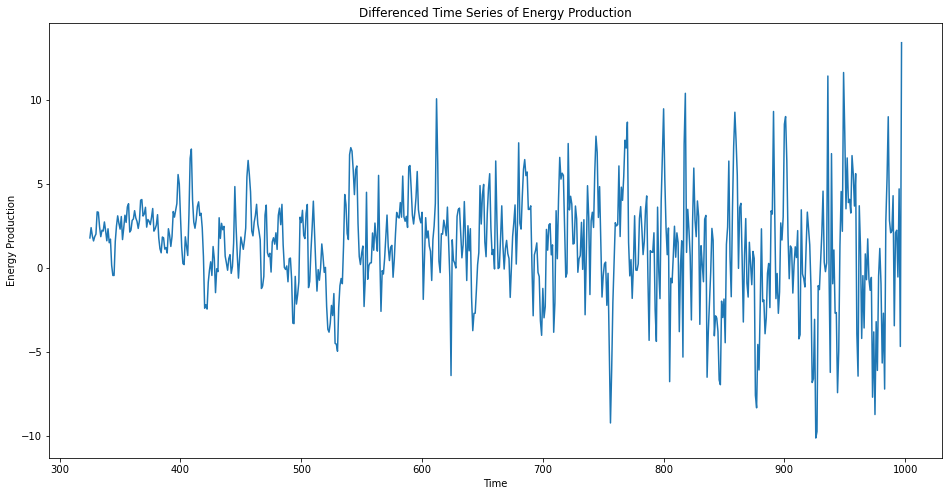

In [175]:
plt.figure(figsize=(16,8));
plt.xlabel('Time');
plt.ylabel('Energy Production');
plt.title('Differenced Time Series of Energy Production');
plt.plot(data2['Energy_Production_diff1']);

In [176]:
X = data2['Energy_Production_diff1'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.217195
p-value: 0.000000
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


Here, the p value is less than 0.05. Thus, we will reject the Null Hypothesis and conclude that the series is stationary.

In [177]:
kpss_test(X)

Results of KPSS Test:
Test Statistic            0.513504
p-value                   0.038625
Lags Used                13.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


The p value of the KPSS test is less than 0.05. Thus, we will reject the null hypothesis that the series is stationary. The KPSS test concludes that the series is non stationary. This outcome is similar to Scenario 3 as mentioned above in this article. Both tests are giving contradictory result with ADF concluding that the series is stationary and KPSS test concluding otherwise. Thus, we can conclude that the series is non stationary. If we plot the ACF and PACF plots of the differenced series, we can see strong positive autocorrelation between the initial lags.

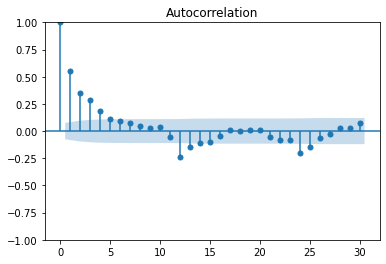

In [179]:
acf_plot = plot_acf(data2['Energy_Production_diff1'], lags= 30)

/Users/akmal/opt/anaconda3/envs/time_series_coursework/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


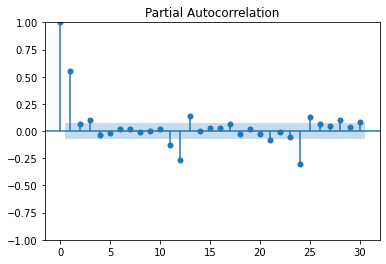

In [180]:
pacf_plot = plot_pacf(data2['Energy_Production_diff1'], lags= 30)

In [181]:
data2['Energy_Production_diff121'] = data2['Energy_Production_diff1'] - data2['Energy_Production_diff1'].shift(1)
data

,Date,Energy production
0,1939-01-01,3.3298
1,1939-02-01,3.3552
2,1939-03-01,3.4315
3,1939-04-01,3.4569
4,1939-05-01,3.4569
...,...,...
993,2021-10-01,90.6041
994,2021-11-01,97.5215
995,2021-12-01,108.1131
996,2022-01-01,130.9957


In [182]:
X = data2['Energy_Production_diff121'].dropna().values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.696151
p-value: 0.000000
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


In [183]:
kpss_test(X)

Results of KPSS Test:
Test Statistic            0.121362
p-value                   0.100000
Lags Used                35.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/Users/akmal/opt/anaconda3/envs/time_series_coursework/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


At this step, both the tests confirm that the series is stationary. Let us plot the ACF and PACF plots and also the plot for the overall differenced series.

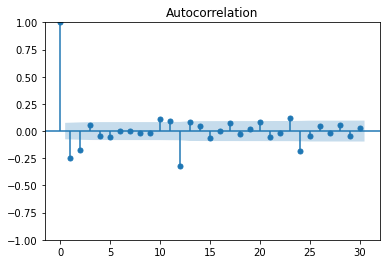

In [184]:
acf_plot = plot_acf(data2['Energy_Production_diff121'].dropna(), lags= 30)

/Users/akmal/opt/anaconda3/envs/time_series_coursework/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


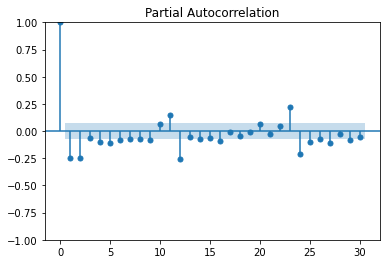

In [185]:
pacf_plot = plot_pacf(data2['Energy_Production_diff121'].dropna(), lags= 30)


Both the plots do have significant lags but we will go ahead and treat the series stationary as confirmed by the ADF and KPSS tests. The plot of the differenced series is as follows:

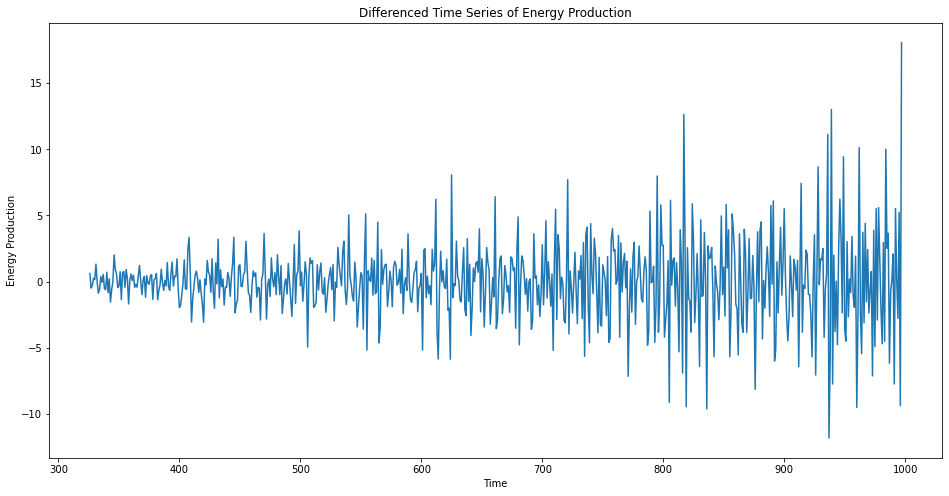

In [186]:
plt.figure(figsize=(16,8));
plt.xlabel('Time');
plt.ylabel('Energy Production');
plt.title('Differenced Time Series of Energy Production');
plt.plot(data2['Energy_Production_diff121']);

So far, we have used differencing twice i.e. one seasonal differencing of order D=1, and one non seasonal differencing of order d=1. The next step is to determine the AR and MA parameters. In the ACF plot, there is a significant negative lag at 1 and at 12 and 24. Thus, the MA parameter should be 1 and seasonal MA parameter should be 2. (Guideline 2, 5) . Given there is a negative lag at 1 and 12 for PACF plot as well, as per the guidelines, we will not include AR and seasonal AR terms.
Thus, the final order of the model seems to be (0,1,1)(0,1,2)12.

In [191]:
import pmdarima as pm
data3 = data2['Energy production']

In [193]:
model = pm.auto_arima(data3, start_p=0, start_q=0,
                          max_p=2, max_q=2,m=12,start_P=0,start_Q=0, 
                          max_P = 2, max_Q = 2,
                          seasonal=True,
                          d=1,D=1,trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3352.330, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3222.096, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3049.905, Time=0.26 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=3255.570, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=3048.325, Time=0.41 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=3183.642, Time=0.13 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=3019.172, Time=1.06 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=3089.946, Time=0.46 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=3001.536, Time=3.29 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=3041.725, Time=2.03 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=3089.801, Time=2.09 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=2945.872, Time=3.53 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=2974.559, Time=3.34 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=2953.662, Time=1.75 sec
 ARIMA(1,1,1)(1,1,1

In [194]:
print(model.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  673
Model:             SARIMAX(1, 1, 1)x(2, 1, [1, 2], 12)   Log Likelihood               -1465.936
Date:                                 Fri, 15 Apr 2022   AIC                           2945.872
Time:                                         11:38:57   BIC                           2977.318
Sample:                                              0   HQIC                          2958.060
                                                 - 673                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4755      0.037     12.845      0.000       0.403       0

Let us look at the summary of the model. Auto Arima gives (1,1,1)(2,1,2)12 as the best model i.e. the model with the least AIC.
Certain checks need to be done : The coefficients of AR and MA terms is less than 1 , the sum of the coefficients of the two seasonal AR terms is less than one and the sum of the coefficients of two MA terms is also less than one. Each of these terms are significant with p value less than 0.05. This seems to be a good model. Thus, a SARIMA model (1,1,1) (2,1,2)12 is the final selected model. (This is close to model (0,1,1)(0,1,2) 12 that we identified from the plots)

In [246]:

train = data[337:661]['Energy production']
test = data[661:]['Energy production']
from statsmodels.tsa.statespace.sarimax import SARIMAX
final_model = SARIMAX(train,order=(1,1,1),seasonal_order=(2,1,2,12))
result = final_model.fit()
print(result.summary())

/Users/akmal/opt/anaconda3/envs/time_series_coursework/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.12864D+00    |proj g|=  5.53788D-01

At iterate    5    f=  1.76634D+00    |proj g|=  1.18753D-01

At iterate   10    f=  1.73920D+00    |proj g|=  1.14171D-02

At iterate   15    f=  1.73881D+00    |proj g|=  3.71564D-03

At iterate   20    f=  1.73879D+00    |proj g|=  1.21808D-04

At iterate   25    f=  1.73878D+00    |proj g|=  7.64495D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     27      1     0     0   

We will also run the model diagnostics to check for the assumptions of normality of errors and the distribution of residuals. If the errors are normally distributed and are uncorrelated to each other, then we actually have a good model.

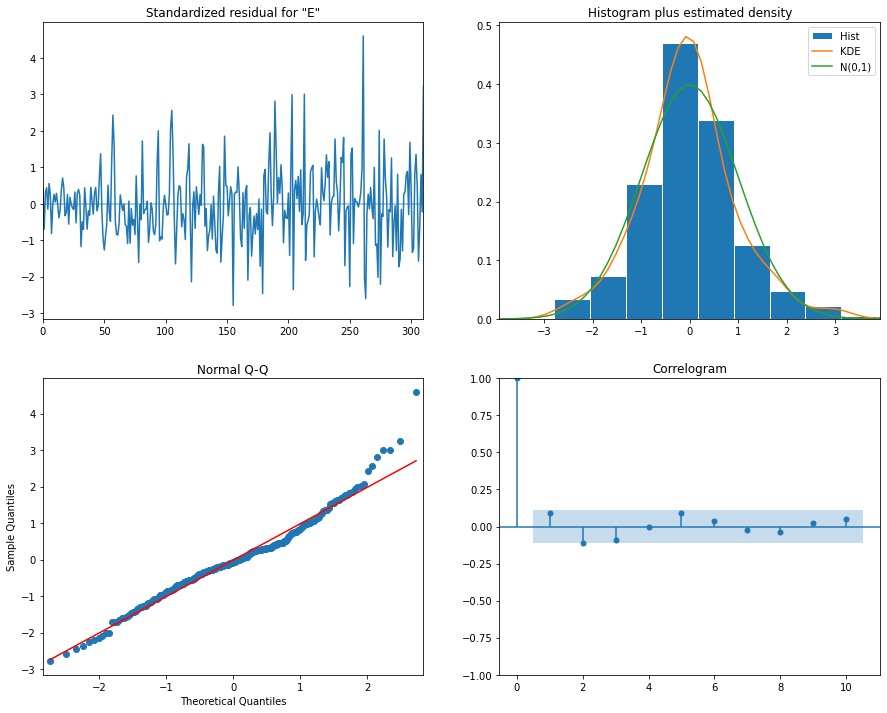

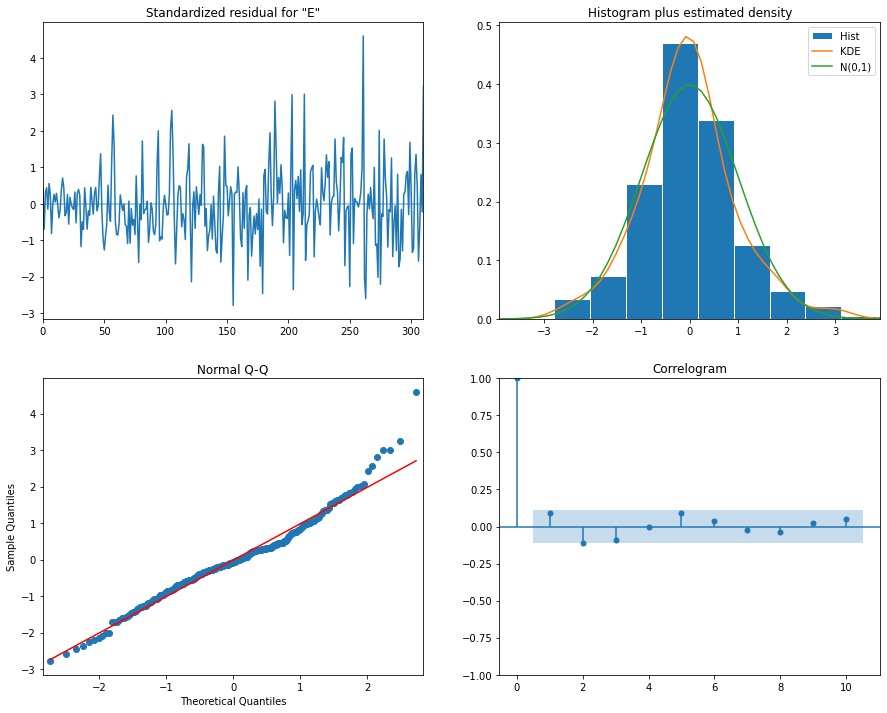

In [247]:
result.plot_diagnostics(figsize=(15, 12))

We will now predict for the test data and then check for the accuracy.

In [248]:
len(train)+len(test)-1

660

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Production')]

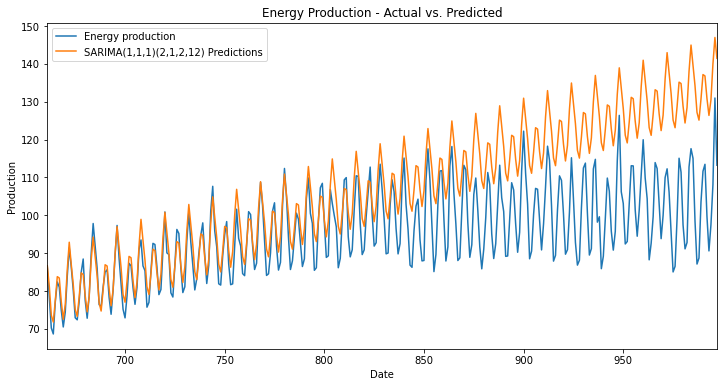

In [249]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = result.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(1,1,1)(2,1,2,12) Predictions')

# Plot predictions against known values
title = 'Energy Production - Actual vs. Predicted'
ylabel='Production'
xlabel='Date'

ax = test.plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [209]:
data3

325     31.1882
326     30.7561
327     29.7902
328     29.5614
329     30.7053
         ...   
993     90.6041
994     97.5215
995    108.1131
996    130.9957
997    113.2367
Name: Energy production, Length: 673, dtype: float64

In [203]:
data2

,Date,Energy production,Moving Avg_12,Energy_Production_diff,Energy_Production_diff1,Energy_Production_diff121
325,1966-02-01,31.1882,29.440717,2.3893,1.7793,NaN
326,1966-03-01,30.7561,29.639825,1.9064,2.3893,0.6100
327,1966-04-01,29.7902,29.798692,1.6013,1.9064,-0.4829
328,1966-05-01,29.5614,29.932133,1.8555,1.6013,-0.3051
329,1966-06-01,30.7053,30.086758,2.0081,1.8555,0.2542
...,...,...,...,...,...,...
993,2021-10-01,90.6041,102.677842,-0.5403,2.2370,0.1499
994,2021-11-01,97.5215,102.632817,4.6938,-0.5403,-2.7773
995,2021-12-01,108.1131,103.023967,-4.6683,4.6938,5.2341
996,2022-01-01,130.9957,102.634942,13.3797,-4.6683,-9.3621


In [222]:
data3[:337]

325    31.1882
326    30.7561
327    29.7902
328    29.5614
329    30.7053
        ...   
657    68.8870
658    73.5969
659    83.3304
660    93.1624
661    86.2650
Name: Energy production, Length: 337, dtype: float64

In [223]:
data3[337:]

662     78.4329
663     70.2386
664     68.6652
665     77.1547
666     82.4132
         ...   
993     90.6041
994     97.5215
995    108.1131
996    130.9957
997    113.2367
Name: Energy production, Length: 336, dtype: float64

In [234]:
from sklearn.model_selection import train_test_split
Y_train, Y_test = train_test_split(data3, test_size=.20, random_state=0)

In [236]:
final_model_Y = SARIMAX(Y_train,order=(1,1,1),seasonal_order=(2,1,2,12))
result_Y = final_model_Y.fit()
print(result_Y.summary())

/Users/akmal/opt/anaconda3/envs/time_series_coursework/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/akmal/opt/anaconda3/envs/time_series_coursework/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.72009D+00    |proj g|=  7.69411D-02

At iterate    5    f=  4.66737D+00    |proj g|=  3.22328D-02

At iterate   10    f=  4.52310D+00    |proj g|=  1.29952D-02

At iterate   15    f=  4.52276D+00    |proj g|=  4.55714D-03

At iterate   20    f=  4.52191D+00    |proj g|=  5.65696D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     23     27      1     0     0   1.451D-05   4.522D+00
  F =   4.5219068667656392     

CONVERG

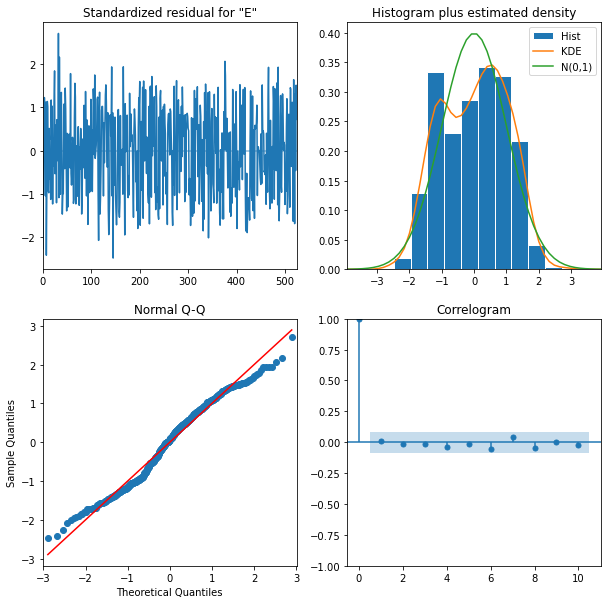

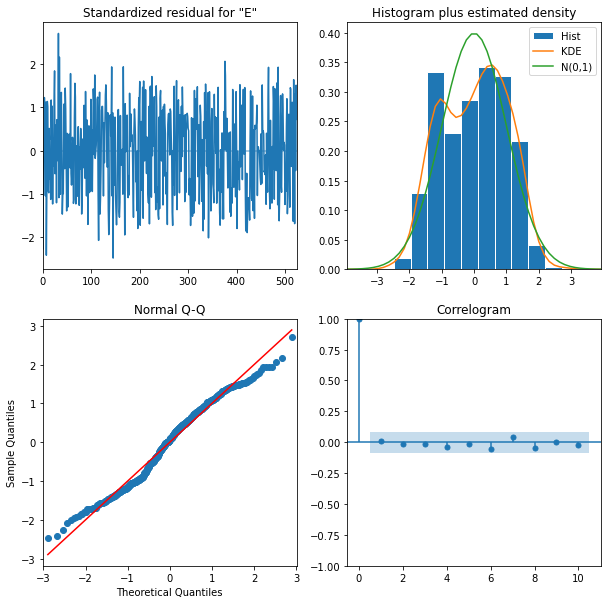

In [239]:
result_Y.plot_diagnostics(figsize=(10, 10))

In [241]:
predictions_Y = result_Y.predict(Y_test, dynamic=False, typ='levels').rename('SARIMA(1,1,1)(2,1,2,12) Predictions_Y')

start=datetime(2014,7,1), end=datetime(2018,9,28)

# Plot predictions against known values
title = 'Energy Production - Actual vs. Predicted'
ylabel='Production'
xlabel='Date'

# ax = test.plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
# ax.autoscale(axis='x',tight=True)
# ax.set(xlabel=xlabel, ylabel=ylabel)

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'